# The Sorting Hat

### *Categorization of users based on predicted user ratings, using Cosine Similarity and Euclidean Distance.*

This is my first notebook on kaggle featuring a personal project in Python using MovieLens user rating Data to predict User ratings for the first Harry Potter movie.

## Introduction

One of the most popular movies of the 00's is "Harry Potter and the Sorcerers' Stone", based on the first wordwidely famous Harry Potter novel of J.K. Rowling. 
In the film we follow the adventures of the young wizard Harry in his first schoolyear at the Hogwarts School for Witchcraft and Wizardry. 
In the beginning of the school year all the new students are assigned to one of the four school houses: Slytherin, Ravenclaw, Hufflepuff or Gryffindor. 

The method for assinging the students to their houses? A hat! By simply putting the Sorting Hat on a students' head, it will blurt out the house where the student is most likely to fulfill their potential. 
How the hat is able to get such deep insights from the students' minds, stays nevertheless a mystery for the viewer.

In this project I recreated the "Sorting Hat", while being able to give a clear explanation on how it works.
The code assigns students to one of the four houses, based on the likelyness of how much they would like Harry Potter. 

To explain, Harry is absolutely detested by the students of Slytherin, more or less tolerated by the Ravenclaws, feared and admired by the Hufflepuffs and Harry's biggest fans are from his own house; Gryffindor.

## Method

In this project I use two datasets from **MovieLens**: the movie dataset and the user rating dataset.
The result is a categorization of users, based on the predicted rating they would give to a film. This predicted rating is based on the average rating of the 10 most similar users that rated this film, gave to the film. To determine how similar users are to each other, based on their rating data, I compared two methods:
**Cosine Similarity** and **Euclidean Distance**.

The users will be represented as vectors. **Cosine Similarity** and **Euclidean Distance** are both mathematical methods to compare vectors respectively by calculating the angle between vectors and the distance.

In this case this method is applied to the film **"Harry Potter and the Sorcerers' Stone"** (HP1) and I call it **the "Sorting Hat"**. The code will predict what rating a user would give to the first Harry Potter movie. The last step is to link this estimated rating ("how much Harry Potter is liked") to one of the four houses:
**Slytherin, Ravenclaw, Hufflepuff or Gryffindor**.
Of course this method is also applicable to other films and other types of datasets with user rating data. 

The theoretical starting point is the idea that people who are similar, have similar taste.
*For example, if two users have a similar behavior in rating films, the chance that they would give Harry Potter a similar rating is quite high. In contrast, two users who rate different films or rate films very differently, are less alike, and have less chance to rate the Harry Potter movie in the same way. In addition, by taking only users who rated the Harry Potter film, it is expected that people who give a high rating have a different profile than people that give a low rating.* The theory will be tested by comparing the favourite films between the users that gave Harry Potter a low rating and the users that gave Harry Potter a high rating.

Something I take into account as well is the difference in rating behavior between users. Some users tend to give low ratings in average, and others tend to give high ratings in average. I test with both Euclidean Distance and Cosine Similarity if this influences the results. 

The accuracy of the methods will be tested on the group of users that all rated the first Harry Potter movie, by comparing their predicted rating with the real rating they gave. 

### Euclidean Distance


Euclidean distance calculates the distance between 2 vectors (here u and v in n dimension) using this formula:

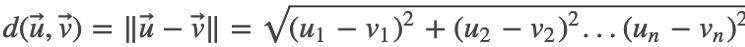

Geometrically it would be the distance between the heads of two vectors, when they are represented from the origin; the tail starts at 0 on the axis.  See the distance d in the image below. 

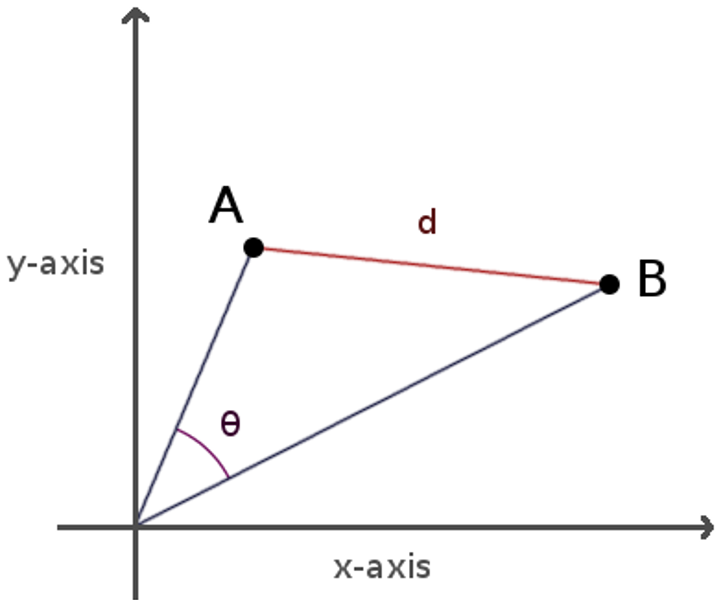

As we can imagine the distance is given in a number between 0 and +infinite.
A 0 means that the users are perfectly similar. The bigger the number, the bigger the distance, the more different users are to each other. 

### Cosine Similarity

Cosine similarity also looks at 2 vectors, but instead of to the distance it looks at the angle between vectors.  
It uses the basic geometric formula of cosinus of an angle between 2 vectors A and B

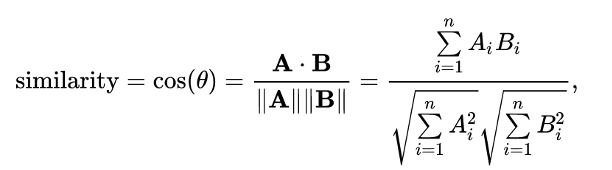

The cos of an angle can vary from -1 to 1. Here the coordinates are positive ratings (from 0 to 5) so all vectors have the same direction. Thus the cosinus of the angle will always be between 0 and 1. A 1 means the vectors are colinear so perfectly aligned. The users are considered perfectly similar.  A 0 means the vectors are perpendiculare, so the users are considered very different.

In the figure above (in 2 dimension) the Cosine similarity of the users is the angle “Teta” between the 2 vectors when drawn from the origin.
Note that 2 colinear vectors with a different norm will still be considered as perfectly similar with this method, which can imply a bias in the results. For example, a user giving a 5 to all the films will be perfectly similar to another giving a 1 to all the films.

## Summary of results

To create the Sorting Hat I tried four different methods: Euclidean Distance and Cosine Similarity, and both once more while correcting the results for User rating behavior (explained in the syntax below).

The method that gives the best results was Cosine Similarity correcting for User rating behavior, with an accuracy of 46.8%.

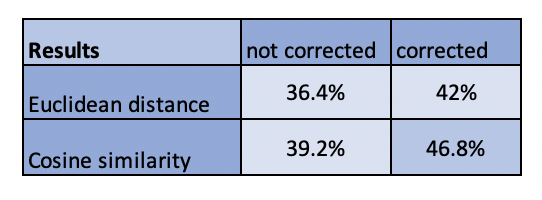

The output table of the method is as below, tested on the whole group of users that rated "Harry Potter and the Sorcerers' Stone". It gives the respectively the real rating, estimated rating and corrected estimated rating, the real house, the estimated house and the corrected estimated house, per user. 

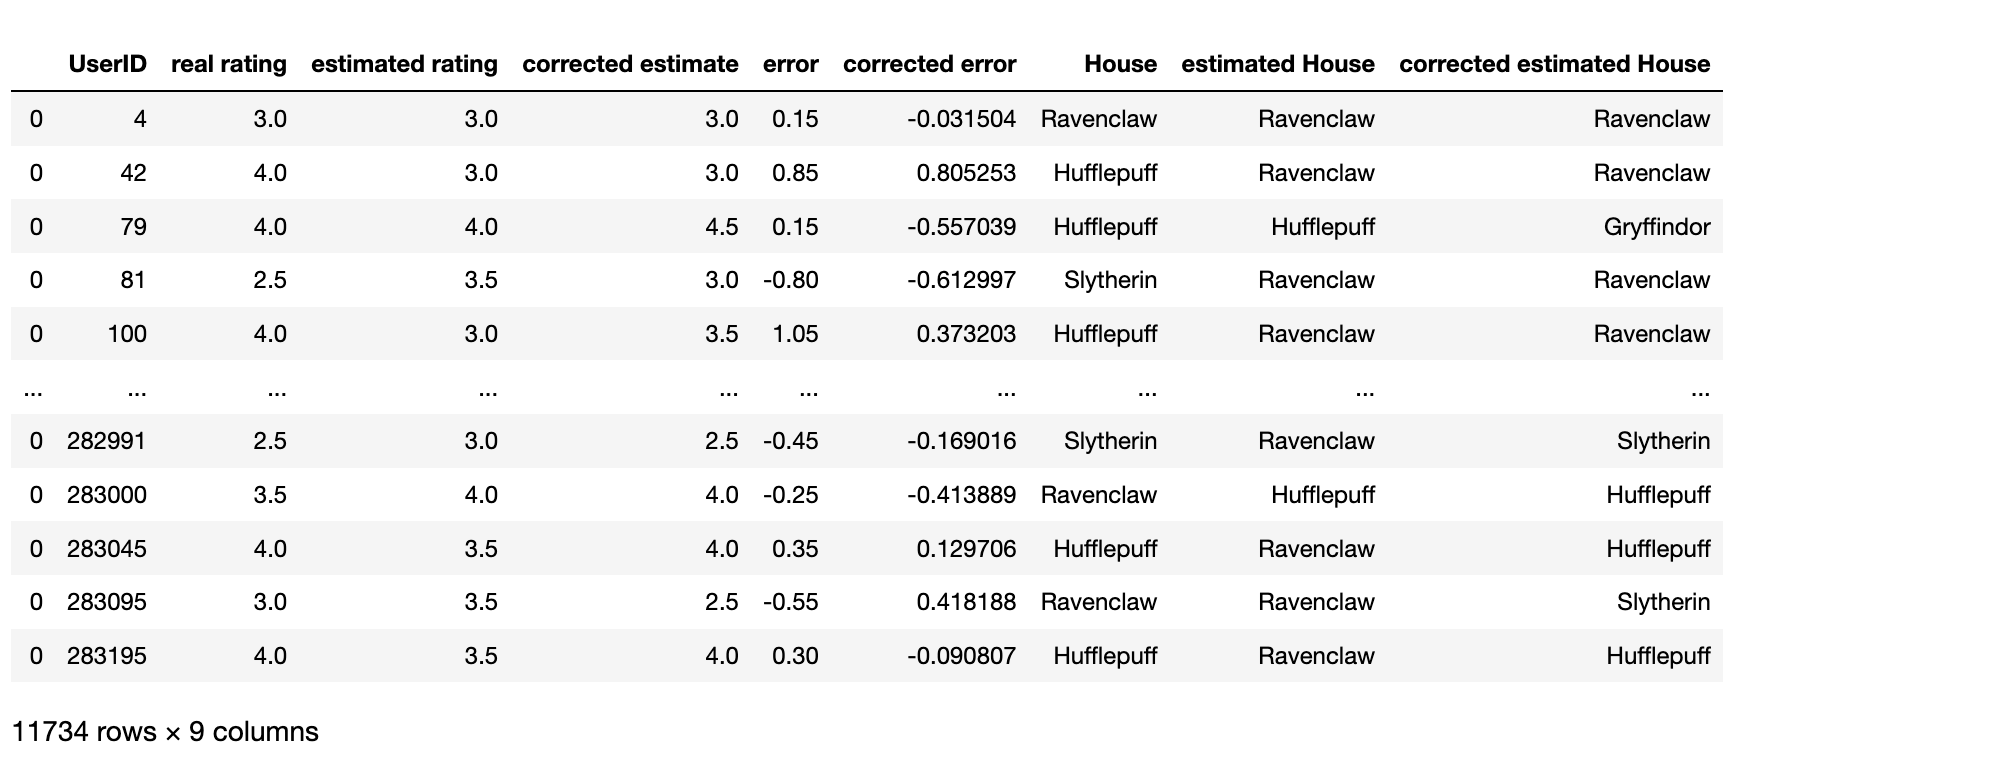

Though the method is far from perfect, it is an improvement to the random assigning of houses, which would give an accuracy of 25%.

## Syntax and Explanation

### *Importing libraries*

The first step is to import the libraries that contain the functions, dataframes, arrays and plots I will use; numpy, sklearn, pandas and matplotlib.


**NumPy**, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.**Sk-learn** provides a range of supervised and unsupervised learning algorithms. The library is focused on modeling data. **Pandas** is a software library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. **Matplotlib** is a 2d plotting library.

In [31]:
#import libraries
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

### *Import Datasets*

**Import table with movie data**

In [32]:
#import movies data table
movies = pd.read_csv('movies.csv') 
#print first 5 rows
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Does the dataset include the Harry Potter movies?

In [33]:
#find movieId with Harry Potter
movies[movies['title'].str.contains("Harry Potter")]

,movieId,title,genres
4801,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
5718,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
7769,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX
10620,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX
12002,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX
13983,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX
16274,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
17608,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
55182,186777,The Greater Good - Harry Potter Fan Film (2013),Action|Adventure|Fantasy


**Import table with user rating data**

In [34]:
#import user rating data table
ratings = pd.read_csv('ratings.csv') 
#print first 5 rows
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


Does the user rating table include the Harry Potter 1 movie ID?

In [35]:
#search for Harry Potter 1 movieId 4896 in ratings table
ratings[ratings['movieId']==4896]

,userId,movieId,rating,timestamp
582,4,4896,3.0,1113765830
1349,15,4896,5.0,1370809892
2946,42,4896,4.0,1251235925
5934,67,4896,5.0,1510267016
6411,72,4896,4.0,1459981693
...,...,...,...,...
27746126,283146,4896,4.0,1235817420
27747752,283165,4896,2.0,1331392447
27748428,283173,4896,5.0,1487522189
27751068,283195,4896,4.0,1086583818


**Delete unneeded data**

In [36]:
#delete column timestamp
del ratings["timestamp"]
#print first 5 rows
ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


### Filtering the data

Now I have a table that contains all the ratings with in each row the userId, MovieId and rating that the user gave to the film. To have less data but to keep data of certain quality, I will apply a filter to this table. I only want to select the users that rated >300 films, and the films that have >3000 ratings. 

To be able to do this I must first create 2 new columns; 1 column that states the number of total ratings by each user, and 1 column that states the total number of ratings for each film. Therefor I create two new tables (while keeping the same index) that I will merge with the original one. I will create conditions for these new columns, to filter out the unwanted data. As the last step I create a new table with this filtered data, and delete the columns that I don't need anymore. 

In [37]:
#create table with number of ratings by each user
numberoffilms = ratings.groupby('userId').transform(lambda x: x.count())
#print first 5 rows
numberoffilms.head()

,movieId,rating
0,16,16
1,16,16
2,16,16
3,16,16
4,16,16


The first rows are all about one user (user 1) that rated 16 movies and gave 16 ratings. I just need the number of ratings for each user, so I delete the column movieId. I cannot merge two tables that have columns with the same name, so I need to change the name of the column before merging the table "numberoffilms" with the original "ratings". 

In [38]:
# delete column movieId
del numberoffilms['movieId']
# rename column rating
numberoffilms = numberoffilms.rename(columns={"rating": "number ratings"})
# merge tables
ratingswithnumber = ratings.join(numberoffilms)
# print last 5 rows
ratingswithnumber.tail()

,userId,movieId,rating,number ratings
27753439,283228,8542,4.5,113
27753440,283228,8712,4.5,113
27753441,283228,34405,4.5,113
27753442,283228,44761,4.5,113
27753443,283228,54286,4.5,113


To add another column with the number of ratings per film, I repeat the process. Instead of grouping by userId I group by MovieId and create a table with the total amount of ratings per film.

In [39]:
# create table with number of ratings per film
numberofusers = ratings.groupby('movieId').transform(lambda x: x.count())
# print first 5 rows
numberofusers.head()

,userId,rating
0,7958,7958
1,6037,6037
2,6138,6138
3,5902,5902
4,6867,6867


In [40]:
# rename column
numberofusers = numberofusers.rename(columns={"userId":"number ratings by film"})
# delete other column
del numberofusers['rating']
# merge tables
ratingsnew = ratingswithnumber.join(numberofusers)
# print first 5 rows
ratingsnew.head()

,userId,movieId,rating,number ratings,number ratings by film
0,1,307,3.5,16,7958
1,1,481,3.5,16,6037
2,1,1091,1.5,16,6138
3,1,1257,4.5,16,5902
4,1,1449,4.5,16,6867


In [41]:
# create condition 'reduced'
reduced = (ratingsnew["number ratings"] > 300) & (ratingsnew["number ratings by film"] > 3000)
# create new table with reduced conditions
ratings_final=ratingsnew[reduced]
# print first 5 rows
ratings_final.head()

,userId,movieId,rating,number ratings,number ratings by film
42,4,1,4.0,736,68469
43,4,2,4.0,736,27143
44,4,5,2.0,736,15474
45,4,6,4.5,736,28683
46,4,10,4.0,736,33086


In [42]:
# delete unneeded columns
del ratings_final['number ratings']
del ratings_final['number ratings by film']

In [43]:
# call for shape of Movielens dataset
ratings.shape

(27753444, 3)

In [353]:
# count amount of unique movies
ratings['movieId'].nunique()

53889

In [354]:
# count amount of unique users
ratings['userId'].nunique()

283228

In [44]:
# call for shape of dataset with conditions
ratings_final.shape

(9302132, 3)

In [45]:
# count amount of unique movies
ratings_final['movieId'].nunique()

1955

In [46]:
# count amount of unique users
ratings_final['userId'].nunique()

21618

In [47]:
# print 5 first rows
ratings_final.head()

,userId,movieId,rating
42,4,1,4.0
43,4,2,4.0
44,4,5,2.0
45,4,6,4.5
46,4,10,4.0


Note that in this new table the first user, user 1, is not visible anymore as he rated 16 films. The first user with >300 films rated is now user 4. 

**The Movielens user rating dataset contained over 27 million ratings (27753444), by 283228 users over 53889 films.**

**With the conditions applied, the table ratings_final contains over 9 million ratings (9302132), by 21618 users over 1955 films.**

### Exploring the user rating data

Before writing the code to create the "Sorting Hat", I want to know more about the dataset of user ratings. Therefor I will visualize how the ratings in the dataset are distributed among the values both in a table (that also gives the proportions) and a histogram. First I will do this for the dataset as a whole. Second I will repeat the process for the first Harry Potter movie alone.

In [51]:
# define rating_hist and rating_hist_HP for table and historgram
rating_hist = ratings_final
rating_hist_HP = rating_hist[rating_hist['movieId'] ==4896]

In [52]:
# create table to see distribution of ratings for HP1 by proportion
quantity=ratings_final.groupby('rating').count()
del quantity['userId']
percentage=(ratings_final.groupby('rating').count()/rating_hist['userId'].count()*100).round(decimals=2)
del percentage['movieId']
proportion = quantity.join(percentage)
proportion = proportion.rename(columns={"movieId":"Quantity","userId":"percentage (%)"})
proportion

,Quantity,percentage (%)
rating,,
0.5,129733,1.39
1.0,262161,2.82
1.5,164236,1.77
2.0,645494,6.94
2.5,557650,5.99
3.0,1825616,19.63
3.5,1364515,14.67
4.0,2486720,26.73
4.5,805516,8.66


**Histogram**

mean = 3.4814924148571533
median = 3.5


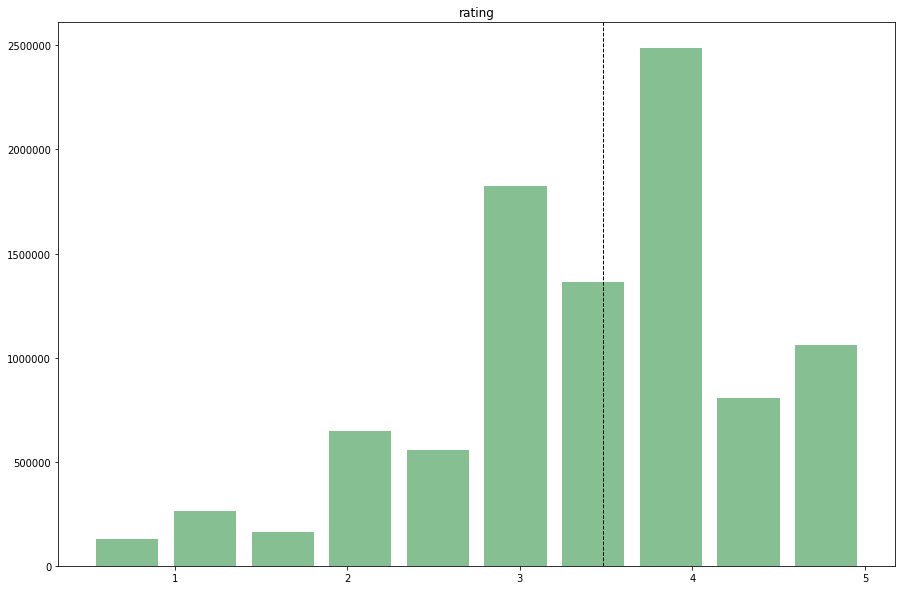

In [53]:
# view the distribution of ratings for all films
ax = rating_hist .hist(column='rating', grid=False, figsize=(15,10), layout=(1,1), sharex=True, color='#86bf91',  rwidth=0.8)
plt.axvline(rating_hist['rating'].mean(), color='k', linestyle='dashed', linewidth=1)
print('mean = {}'.format(rating_hist['rating'].mean()))
print('median = {}'.format(rating_hist['rating'].median()))

**Distribution of ratings in whole dataset**

We see here that the possible ratings are half rounded number with a spread from 0.5 to 5. A 4 is the most given rating, by 26.73%, with the 3 at second place by 19.63%. The least given rating is a 0.5, by 1.39%. The average of all the ratings together is a 3.48. The median is 3.5, which tells us that people have the tendency to give a higher rating. As visualized in the histogram, we see that there is a drop when we look at the rating below 3.

A thought here is the possibility that people tend to rate more movies that they like, than movies that they don't like. Also, it would make sense if we assume that people mostly watch films for entertainment and would choose to watch films of which they think they could please them. I mean, would you watch a film you think you would hate, for fun?

### Exploring Harry Potter User rating data

**Table of proportions**

In [54]:
# create table to see distribution of ratings for HP1 by proportion
quantity=rating_hist_HP.groupby('rating').count()
del quantity['userId']
percentage=(rating_hist_HP.groupby('rating').count()/rating_hist_HP['userId'].count()*100).round(decimals=2)
del percentage['movieId']
proportion = quantity.join(percentage)
proportion = proportion.rename(columns={"movieId":"Quantity","userId":"percentage (%)"})
proportion

,Quantity,percentage (%)
rating,,
0.5,171,1.46
1.0,214,1.82
1.5,170,1.45
2.0,641,5.46
2.5,703,5.99
3.0,2264,19.29
3.5,2101,17.91
4.0,3236,27.58
4.5,986,8.40


**Histogram**

mean = 3.524842338503494
median = 3.5


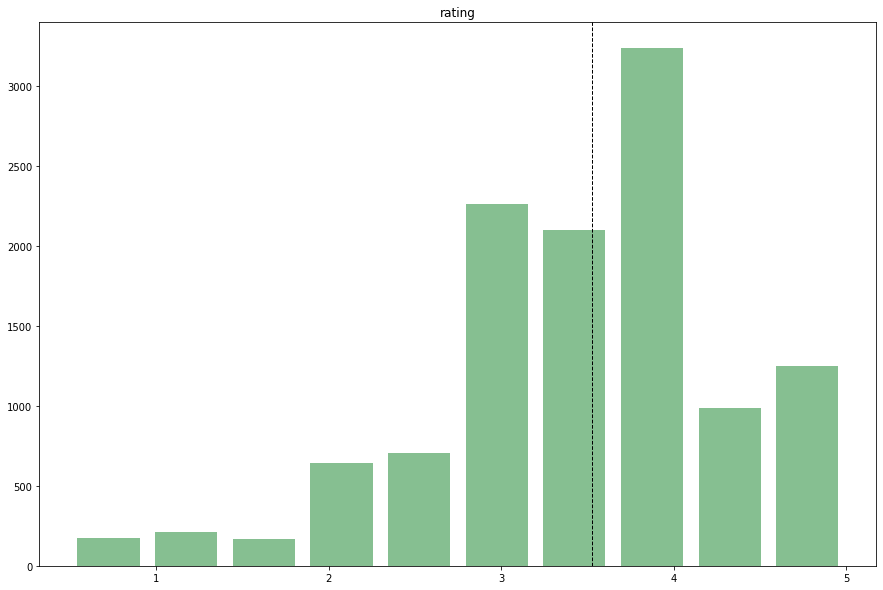

In [55]:
# create histogram for distribution of ratings for Harry Potter Id 4896
ax = rating_hist_HP .hist(column='rating', grid=False, figsize=(15,10), layout=(1,1), sharex=True, color='#86bf91',  rwidth=0.8)
plt.axvline(rating_hist_HP['rating'].mean(), color='k', linestyle='dashed', linewidth=1)
print('mean = {}'.format(rating_hist_HP['rating'].mean()))
print('median = {}'.format(rating_hist_HP['rating'].median()))

**Distribution of Harry Potter 1 ratings**

Alse here the possible ratings are half rounded number with a spread from 0.5 to 5. A 4 is the most given rating, by 27.58%, the 3 comes second place with 19.27% and as 3rd place the 3.5 with 17.91%. The least given rating is a 0.5, by 1.46%. The average of all the ratings together is a 3.53, slightly higher than the average of the whole dataset. The median is 3.5.

Apart from some slight differences the distribution of ratings for HP1 looks more or less the same as for the whole dataset. Also here there is a drop in people that given HP1 a rating less than 3. For my project this means that I have less data on people that dislike Harry Potter, than on people that like Harry Potter. The distribution of the ratings is not evenly. I have to keep this in mind when I link the ratings to the four houses. 

Another way to see the distribution of ratings is by creating a boxplot.

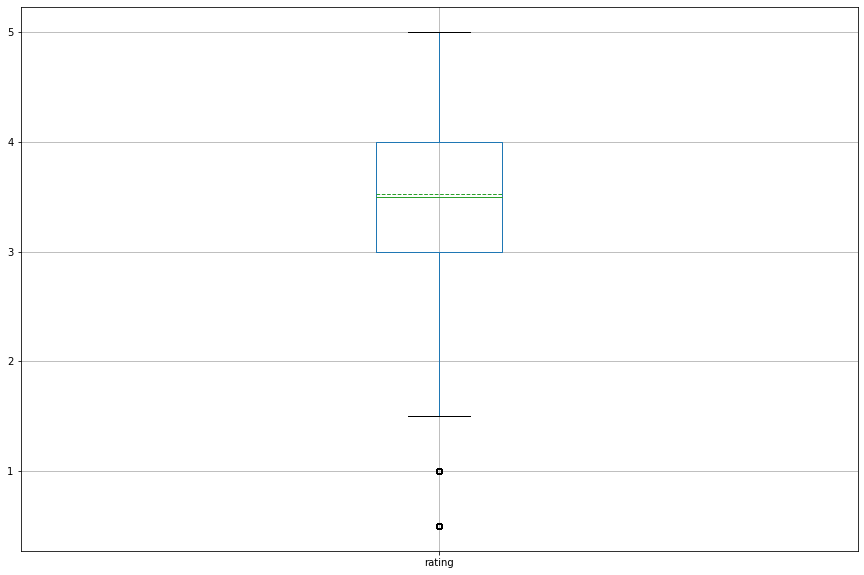

In [56]:
# create boxplot for distribution of ratings for HP1
rating_hist_HP.boxplot(column='rating',figsize=(15,10),meanline=True,showmeans=True) 

### *What would be a possible range of ratings to assign the Houses?*

Taking in account the distribution of the ratings for "Harry Potter and the Sorcerers' Stone" I assign the houses as follows:

**Griffyndor > 4** *(19.04% of users)*

**Hufflepuf == 4** *(27.58% of users)*

**Ravenclaw > 3 and < 4** *(17.19% of users)*

**Slytherin =< 3** *(35.57% of users)*

*Note that the amount of users that rated HP1 cannot be evenly distributed among the 4 categories. For example, it is not possible to split the group users that gave a rating of 3 in two. The way the ratings are linked to the houses is therefor not ideal. Slytherin is now the biggest house with 35.57%, the smallest house is Ravenclaw with 17.19%.*

## Testing Theory

The choice to use Cosine Similarity and Euclidean Distance is based on the idea that similar users will have similar taste. That means that different users have different taste. I want to test this theory with the user rating data of Harry Potter 1, by comparing the 50 favourite films of two groups: Harry Potter "fans" that rated the movie with a 5, and Harry Potter "haters" that rated the movie a 2 or below. 

**Fans**

In [57]:
# create table with only harry potter fans that rated HP1 a 5
Fan = ratings_final[(ratings_final['movieId'] ==4896) & (ratings_final['rating'] ==5)]
# transform into dataframe
HP_fan_ratings=pd.DataFrame()
for i in list(Fan['userId']):
    HP_fan_ratings= HP_fan_ratings.append(ratings_final[ratings_final['userId'] ==i])

In [58]:
# view average highest rated films by HP1 fans
HP_fan_ratings.groupby('movieId').apply(lambda x: x.mean())['rating'].nlargest(10)

movieId
4896     5.000000
5816     4.705748
8368     4.679856
88125    4.669558
40815    4.627021
69844    4.615497
81834    4.610599
54001    4.598667
7153     4.493737
4993     4.492498
Name: rating, dtype: float64

In [59]:
# create table with 50 corresponding movieID's by using the movies data
fan_favourites = pd.DataFrame()
for i in list(HP_fan_ratings.groupby('movieId').apply(lambda x: x.mean())['rating'].nlargest(50).index):
    fan_favourites = fan_favourites.append(movies[movies['movieId']==i])
# print first 20 rows
fan_favourites.head(20)

,movieId,title,genres
4801,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
5718,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
7769,8368,Harry Potter and the Prisoner of Azkaban (2004),Adventure|Fantasy|IMAX
17608,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
10620,40815,Harry Potter and the Goblet of Fire (2005),Adventure|Fantasy|Thriller|IMAX
13983,69844,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX
16274,81834,Harry Potter and the Deathly Hallows: Part 1 (...,Action|Adventure|Fantasy|IMAX
12002,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX
7042,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
4898,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy


**Haters**

In [60]:
# create table with Harry Potter Haters that rated HP1 <=2
Haters = ratings_final[(ratings_final['movieId'] ==4896) & (ratings_final['rating'] <=2)]
# transform into dataframe
HP_haters_ratings=pd.DataFrame()
for i in list(Haters['userId']):
    HP_haters_ratings= HP_haters_ratings.append(ratings_final[ratings_final['userId'] ==i])

In [61]:
# view average highest rated films by HP1 haters
HP_haters_ratings.groupby('movieId').apply(lambda x: x.mean())['rating'].nlargest(10)

movieId
858     4.093171
296     4.092937
2019    4.073879
318     4.039540
922     4.023810
2959    4.023400
1203    4.009434
1221    3.996464
3030    3.988827
1213    3.986649
Name: rating, dtype: float64

In [62]:
# create table with 50 corresponding movieId's by using movies data
haters_favourites = pd.DataFrame()
for i in list(HP_haters_ratings.groupby('movieId').apply(lambda x: x.mean())['rating'].nlargest(50).index):
    haters_favourites = haters_favourites.append(movies[movies['movieId']==i])
# print first 20 rows
haters_favourites.head(20)

,movieId,title,genres
843,858,"Godfather, The (1972)",Crime|Drama
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1936,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama
315,318,"Shawshank Redemption, The (1994)",Crime|Drama
905,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance
2874,2959,Fight Club (1999),Action|Crime|Drama|Thriller
1178,1203,12 Angry Men (1957),Drama
1195,1221,"Godfather: Part II, The (1974)",Crime|Drama
2944,3030,Yojimbo (1961),Action|Adventure
1187,1213,Goodfellas (1990),Crime|Drama


In [63]:
# create table with films that are favourites of both haters and fans
intersection = pd.merge(fan_favourites, haters_favourites, how='inner', on=['movieId'])
# view table
intersection

,movieId,title_x,genres_x,title_y,genres_y
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,"Shawshank Redemption, The (1994)",Crime|Drama
1,950,"Thin Man, The (1934)",Comedy|Crime,"Thin Man, The (1934)",Comedy|Crime
2,1203,12 Angry Men (1957),Drama,12 Angry Men (1957),Drama
3,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
4,858,"Godfather, The (1972)",Crime|Drama,"Godfather, The (1972)",Crime|Drama
5,1284,"Big Sleep, The (1946)",Crime|Film-Noir|Mystery,"Big Sleep, The (1946)",Crime|Film-Noir|Mystery
6,904,Rear Window (1954),Mystery|Thriller,Rear Window (1954),Mystery|Thriller
7,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller


The fans and haters of Harry Potter have 7 out of 50 films in common, when we look at their favourite films. That is a proportion of 14%. With this result I dare to say that the taste of both groups is indeed different, and the use of Cosine Similarity and Euclidean Distance is plausible.

## Preparing the dataset for further manipulation and analysis

The next step is to make my table fit for the further calculations and manipulation of the data.

In [328]:
# call for shape of dataset
ratings_final.shape

(9302132, 3)

My table contains 9302132 rows and 3 columns. The information that is given is saved in the most efficient way: each row contains the index number, the user id, the movie id and the rating given. 

However, I would like to create a table (matrix) where it is possible to look up each user, and then each film, and then find the value of the rating that the user has given the film. This means that there are missing values in the matrix, because not all users rated all the films. 

As the index I will use each film "movieID" and as columns I will use the users "userID". This will give me a table with the ratings as data, including missing values (0.0).

In [329]:
# create matrix of table 'ratings_final'
pivot = pd.pivot_table(ratings_final, index=["movieId"], columns="userId", fill_value=0)
# print first 5 rows
pivot.head()

rating                                                                 \
userId  4      42     51     56     73     79     81     88     100    114      
movieId                                                                         
1          4.0    4.0      4    2.5    4.0    5.0    0.0    0.0    4.0      5   
2          4.0    3.0      3    3.5    0.0    4.0    3.0    0.0    3.5      4   
3          0.0    0.0      4    0.0    0.0    0.0    3.5    0.0    0.0      2   
5          2.0    0.0      0    0.0    0.0    0.0    0.0    0.0    0.0      0   
6          4.5    0.0      3    4.5    3.0    0.0    4.0    4.5    3.5      5   

         ...                                                                 \
userId   ... 283008 283045 283095 283116 283117 283153 283170 283184 283195   
movieId  ...                                                                  
1        ...      4    4.5    0.0      0    0.0    3.0    0.0    4.0    5.0   
2        ...      3    0.0    0.0      0    0.0    0.0    0.0    2.5    4.0   
3        ...      4    0.0    0.0      0    0.0    2.0    0.0    0.0    4.5   
5        ...      3    4.0    0.0      0    0.0    0.0    0.0    0.0    0.0   
6        ...      3    0.0    0.0      0    0.0    0.0    4.5    0.0    4.5   

                
userId  283224  
movieId         
1            0  
2            0  
3            4  
5            0  
6            0  

[5 rows x 21618 columns]

The table has 9,3 million values (ratings).
The matrix has the dimension of 1955 x 21618, meaning around 42 million values.

A big majority of the values in the matrix are now 0.0, around 80%. The name that is generally used for such a matrix is "**sparse matrix**". Less optimized for storage of data, but needed for using Cosine Similarity and Euclidean Distance. 

*Note: Here we see the movieId as index does create an index with 'missing' numbers, for example, I'm missing a 4 in the index. This is important to note as we need to assure that we will be able to trace back the corresponding films while we analyse our data later on. The same applies for the UserId's.*

In [330]:
# call for shape of matrix 'pivot'
pivot.shape

(1955, 21618)

I have 1955 rows (1955 films) and 21618 columns (12618 users).
I noticed that by using Cosine Similarity and Euclidean Distance, the user index is erased and replaced by an incremental index. I want to save the original UserId index, that's why I seperately store the index in a correspondence table.

In [331]:
# create list of userID's
users = list (pivot.columns)
# create table with index and userID's
index_user = pd.DataFrame(columns=['UserID'])
for i in range(len(users)):
    index_user = index_user.append({'UserID': users[i][1]}, ignore_index=True)
# print last 5 rows
index_user.tail()

,UserID
21613,283153
21614,283170
21615,283184
21616,283195
21617,283224


Now I have my index safe and sound, I will create another matrix by transposing the pivot table. This will mean that I interchange the rows and columns. It is not the perfect method, but it is easier for me to be able to use both matrixes later on in the code. 

In [347]:
# transpose the matrix
T = pivot.transpose()
# print first 10 rows
T.head(10)

movieId        1       2       3       5       6       7       9       10      \
       userId                                                                   
rating 4          4.0     4.0     0.0     2.0     4.5     0.0     0.0     4.0   
       42         4.0     3.0     0.0     0.0     0.0     0.0     0.0     3.0   
       51         4.0     3.0     4.0     0.0     3.0     0.0     0.0     0.0   
       56         2.5     3.5     0.0     0.0     4.5     0.0     0.0     0.0   
       73         4.0     0.0     0.0     0.0     3.0     0.0     0.0     0.0   
       79         5.0     4.0     0.0     0.0     0.0     0.0     0.0     0.0   
       81         0.0     3.0     3.5     0.0     4.0     0.0     0.0     2.5   
       88         0.0     0.0     0.0     0.0     4.5     0.0     0.0     0.0   
       100        4.0     3.5     0.0     0.0     3.5     0.0     0.0     0.0   
       114        5.0     4.0     2.0     0.0     5.0     0.0     0.0     0.0   

movieId        11      12      ...  152077  152081  164179  164909  166461  \
       userId                  ...                                           
rating 4          3.5     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       42         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       51         4.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       56         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       73         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       79         4.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       81         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       88         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       100        0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
       114        3.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

movieId        166528  168250  168252  174055  176371  
       userId                                          
rating 4          0.0     0.0     0.0     0.0     0.0  
       42         0.0     0.0     0.0     0.0     0.0  
       51         0.0     0.0     0.0     0.0     0.0  
       56         0.0     0.0     0.0     0.0     0.0  
       73         0.0     0.0     0.0     0.0     0.0  
       79         0.0     0.0     0.0     0.0     0.0  
       81         0.0     0.0     0.0     0.0     0.0  
       88         0.0     0.0     0.0     0.0     0.0  
       100        0.0     0.0     0.0     0.0     0.0  
       114        0.0     0.0     0.0     0.0     0.0  

[10 rows x 1955 columns]

In [352]:
# Call for shape to see rows and columns
T.shape

(21618, 1955)

I will use matrix T to compare the users with each other. Now the matrix contains the ratings to the first Harry Potter film. It would not be completely fair to include this information while comparing user similarity, so I will remove the ratings for HP1. The user similarity (both by Euclidean Distance and Cosine similarity) will be defined without looking at the first Harry Potter film. 

In [349]:
# Copy matrix T
TminHP = T.copy()

In [350]:
# delete column with HP1 ratings
del TminHP[4896]
# call for shape
TminHP.shape

(21618, 1954)

Mathematically each user is now represented by a vector of 1954 dimensions, where each dimension consists of a film and the coordinate is the rating the user gave to the film. 
So since we are comparing 21618 users, we have 21618 vectors, each of 1954 dimensions.

To compare these vectors I will use Euclidean Distance and Cosine Similarity as described in the introduction. 

**Creating an Euclidean distance dataframe**

In [279]:
# import Euclidean distance function
from sklearn.metrics.pairwise import euclidean_distances
# create table with Euclidean distance from TminHP
Simi_EUC = euclidean_distances(TminHP)
# call for shape for simi_EUC to check if the Euclidean distance is applied to the rows
Simi_EUC.shape

(21618, 21618)

In [280]:
# show output Simi_EUC in arrays
Simi_EUC

array([[  0.        ,  89.59213135,  95.40833297, ...,  96.24967532,
        107.33592129,  98.90778534],
       [ 89.59213135,   0.        ,  84.57836603, ...,  73.76143979,
        112.26197041,  80.19663335],
       [ 95.40833297,  84.57836603,   0.        , ...,  90.21779204,
        118.21696156,  70.41306697],
       ...,
       [ 96.24967532,  73.76143979,  90.21779204, ...,   0.        ,
        116.06248317,  85.42394278],
       [107.33592129, 112.26197041, 118.21696156, ..., 116.06248317,
          0.        , 119.10184717],
       [ 98.90778534,  80.19663335,  70.41306697, ...,  85.42394278,
        119.10184717,   0.        ]])

In [337]:
# transport Simi_EUC into dataframe for further analysis
df_EUC = pd.DataFrame(Simi_EUC)
# print first 5 rows
df_EUC.head()

,0,1,2,3,4,5,6,7,8,9,...,21608,21609,21610,21611,21612,21613,21614,21615,21616,21617
0,0.000000,89.592131,95.408333,88.153276,98.098165,96.310695,92.288948,94.178023,87.569972,87.958797,...,91.448073,96.022133,97.435876,102.228910,91.100220,91.457640,98.052282,96.249675,107.335921,98.907785
1,89.592131,0.000000,84.578366,72.448257,69.253159,83.030115,88.946613,73.104377,80.179486,79.771549,...,79.432361,76.003289,68.862181,82.440888,76.993506,68.218399,73.194945,73.761440,112.261970,80.196633
2,95.408333,84.578366,0.000000,80.874903,86.582331,86.353923,101.636608,87.961639,90.461318,75.723180,...,69.296465,87.375626,89.607477,85.023526,87.226716,75.889723,91.137259,90.217792,118.216962,70.413067
3,88.153276,72.448257,80.874903,0.000000,73.890121,85.163079,85.660668,76.285647,80.672176,79.779383,...,80.813056,80.788304,78.477704,83.586781,80.067159,73.972968,80.076526,80.696964,111.308131,81.226535
4,98.098165,69.253159,86.582331,73.890121,0.000000,88.490112,86.287311,72.244377,85.978195,86.513005,...,82.598426,87.146428,72.783927,75.249585,81.871851,74.657552,75.339233,72.710041,118.271932,78.425124


Above we see the matrix with the comparison between users in Euclidean distance. Eucledian distance measures how far or close vectors are from each other. The smaller the number, the more similar users are to each other. In this table we see the value 0.0. This means that there is no distance at all. Logically, we see this value as diagonal line through the table, since in this line users are compared with themselves, it's the same user so absolutely identical. 

To find the most similar users by Eucledian distance, I have to look for the users with the smallest numbers.

**Creating a Cosine Similarity dataframe**

In [282]:
# import cosine similarity function
from sklearn.metrics.pairwise import cosine_similarity
# create table with the cosine similarity of T
Simi = cosine_similarity(TminHP)
# call for shape of Simi to check if the cosine similarity applied to the rows
Simi.shape

(21618, 21618)

In [283]:
# show output'Simi' organized in arrays
Simi

array([[1.        , 0.36959941, 0.33265199, ..., 0.30805602, 0.53877658,
        0.22020444],
       [0.36959941, 1.        , 0.21466358, ..., 0.38537127, 0.43255942,
        0.19238403],
       [0.33265199, 0.21466358, 1.        , ..., 0.18697432, 0.36890239,
        0.46175616],
       ...,
       [0.30805602, 0.38537127, 0.18697432, ..., 1.        , 0.39262501,
        0.17965547],
       [0.53877658, 0.43255942, 0.36890239, ..., 0.39262501, 1.        ,
        0.33253402],
       [0.22020444, 0.19238403, 0.46175616, ..., 0.17965547, 0.33253402,
        1.        ]])

In [338]:
# transform Simi into dataframe for further analysis
df = pd.DataFrame(Simi)
# print 5 first rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21608,21609,21610,21611,21612,21613,21614,21615,21616,21617
0,1.000000,0.369599,0.332652,0.426801,0.270084,0.380633,0.516647,0.282254,0.513092,0.380918,...,0.349886,0.339749,0.200827,0.213275,0.341929,0.261908,0.228186,0.308056,0.538777,0.220204
1,0.369599,1.000000,0.214664,0.410242,0.445798,0.358205,0.439211,0.299557,0.455679,0.155044,...,0.223002,0.394288,0.345346,0.228374,0.240989,0.273631,0.317479,0.385371,0.432559,0.192384
2,0.332652,0.214664,1.000000,0.349379,0.236673,0.367749,0.296012,0.124101,0.353647,0.347881,...,0.486739,0.282740,0.047032,0.275988,0.156051,0.251764,0.081762,0.186974,0.368902,0.461756
3,0.426801,0.410242,0.349379,1.000000,0.431004,0.374292,0.507645,0.326073,0.481866,0.253804,...,0.281998,0.374067,0.253234,0.284060,0.271330,0.266650,0.274292,0.334563,0.455482,0.262320
4,0.270084,0.445798,0.236673,0.431004,1.000000,0.310506,0.494247,0.378244,0.398802,0.094674,...,0.229433,0.255035,0.339546,0.405542,0.216101,0.222936,0.339829,0.446606,0.358782,0.293378


The table above gives us the Cosine Similarity of the users. Cosine Similarity measures the angle between vectors, and gives a number between 0 and 1. A 0 means 'no similarity at all', while a 1 means 'perfect similarity'. In this table we see a diagonal line of 1's. This is where there is 'perfect similarity' since we compare the users with themselves.

To find the most similar users with Cosine Similarity, I have to look for the users with the biggest number.

# Euclidean Distance

## METHOD I

I will show the method first with an example, taking a random user and up to a 1000 similar users from the Euclidean Distance dataframe.

I will take user n with index 0 and print their 20 closest users according to the Euclidean Distance. I will also print the real rating the user gave to the Harry Potter film. After, I will print the ratings the 10 closest users gave to HP1. From these users together I take the mean, which will be the estimated rating for user n. 
The estimated rating will be rounded up to a 0.50 number.
In the last step I declare the conditions for printing the estimated house. 

The information in the output is for the reader to follow the steps.

**Example Eucledian distance with user index 0**

In [403]:
# What is the user ID for user index 0
n = 0
print("THE SORTING HAT!")
print("--------------------------------------------------")
print("Let's look at the user with indexnumber {} ".format(n))
print("This user (index {}) has UserId = {} ".format(n,users[n][1]))
# what are the 20 closest users to this user?
print("Their closest users are:")
print(df_EUC[n].nsmallest(21))
# print the real rating of the user
print("--------------------------------------------------")
print("User {} rated HP1 {} out of 5".format(users[n][1],pivot.loc[4896].iloc[n]))
print("--------------------------------------------------")
print("Their closest users rated HP1:")

# initializing values
numerator = 0
denominator = 0
counter = 0

# iterating over the 1000 closest users
for i in range(1,1000):
    
# creating a condition to stop estimating when I've found 10 similar users that rated HP1
    if counter <10 :

# does the user rate HP? if yes, I will take his rating into account and add 1 to the counter
        if pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]] != 0:

# I add his rating in the numerator for mean calculation
            numerator = numerator + pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]
    
# I increment the denominator
            denominator = denominator +1 
            counter = counter +1
            
# printing the rating the 10 closest users gave to HP1           
            print("rating given {}".format(pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]))
print("--------------------------------------------------")

# printing the estimated rating
print("The estimated rating using Euclidean distance is {}".format(numerator/denominator))
print("--------------------------------------------------")

# Rounding the ratings at 0.5
estimate = numerator/denominator
double = 2*estimate
rounded = round(double)
newestimate = rounded/2            

# Finding the house by applying the conditions
if newestimate >5:
    print('GRYFFINDOR!')  
    
if newestimate ==4:
    print('HUFFLEPUFF!')
    
if newestimate >= 3 and newestimate <4:
    print('RAVENCLAW!')
    
if newestimate < 3:
    print('SLYTHERIN!')


THE SORTING HAT!
--------------------------------------------------
Let's look at the user with indexnumber 0 
This user (index 0) has UserId = 4 
Their closest users are:
0         0.000000
2635     69.492805
12625    70.340245
11371    70.363343
17093    72.221880
6941     72.692847
19695    72.953752
10358    73.039373
19713    73.235920
17741    73.345075
34       73.413214
5030     73.719061
20325    73.842738
4228     73.996622
2606     74.011823
16302    74.183893
15318    74.234426
6328     74.411021
5243     74.419420
11079    74.466435
6342     74.570437
Name: 0, dtype: float64
--------------------------------------------------
User 4 rated HP1 3.0 out of 5
--------------------------------------------------
Their closest users rated HP1:
rating given 1.0
rating given 3.0
rating given 1.5
rating given 1.5
rating given 1.0
rating given 3.0
rating given 2.0
rating given 4.0
rating given 3.0
rating given 3.5
--------------------------------------------------
The estimated rating 

**Example Eucledian distance with correcting for rating behavior user index 0**

I will do exactly the same as above, but I will correct the estimated rating with the average rating behavior of the similar users. It means that I look at the average rating each user gave, and adjust the given ratings somewhat up or down, depending on if the user tends to rate low or high. This will give an corrected estimated rating for the user n. 

In [397]:
# What is the user ID for user index 0
n = 0
print("THE SORTING HAT!")
print("--------------------------------------------------")
print("Let's look at the user with indexnumber {} ".format(n))
print("This user (index {}) has UserId = {} ".format(n,users[n][1]))
print("--------------------------------------------------")
print("User {} rated HP1 {} out of 5".format(users[n][1],pivot.loc[4896].iloc[n]))
print("--------------------------------------------------")
print("Their closest users rated HP1:")

# initializing values
numerator = 0
denominator = 0
counter = 0
corrected_numerator = 0

# iterating over the 1000 closest users
for i in range(1,1000):
    
# creating a condition to stop estimating when I've found 10 similar users that rated HP1
    if counter <10 :

# does the user rate HP? if yes, I will take his rating into account and add 1 to the counter
        if pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]] != 0:

# I add his rating in the numerator for mean calculation
            numerator = numerator + pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]
    
# I increment the denominator
            denominator = denominator +1 

# I create a "corrected numerator" correcting the estimated rating given to HP using the formula below 
# Corrected rating = rating x (average rating the user n gave to all films)/(average rating the similar user gave to all films)
            corrected_numerator = corrected_numerator + pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df_EUC[n].nsmallest(1000).index[i]][T.iloc[df_EUC[n].nsmallest(1000).index[i]]>0].mean())
            counter = counter +1
            
# printing both rating and corrected rating            
            print("Rating given ---{}--- and Corrected rating given ---{}".format(pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]],pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df_EUC[n].nsmallest(1000).index[i]][T.iloc[df_EUC[n].nsmallest(1000).index[i]]>0].mean())))

# printing the estimated and the corrected estimated rating
print("--------------------------------------------------")  
print("The estimated rating using Euclidean distance is {}".format(numerator/denominator))
print("--------------------------------------------------")  
print("The corrected estimated rating using Euclidean distance is {}".format(corrected_numerator /denominator))
print("--------------------------------------------------") 
    
# Rounding the ratings at 0.5
estimate = corrected_numerator/denominator
double = 2*estimate
rounded = round(double)
newestimate = rounded/2            

# Finding the house
if newestimate >5:
    print('GRYFFINDOR!')  
    
if newestimate ==4:
    print('HUFFLEPUFF!')
    
if newestimate >= 3 and newestimate <4:
    print('RAVENCLAW!')
    
if newestimate < 3:
    print('SLYTHERIN!')


THE SORTING HAT!
--------------------------------------------------
Let's look at the user with indexnumber 0 
This user (index 0) has UserId = 4 
--------------------------------------------------
User 4 rated HP1 3.0 out of 5
--------------------------------------------------
Their closest users rated HP1:
Rating given ---1.0--- and Corrected rating given ---1.4694846177665253
Rating given ---3.0--- and Corrected rating given ---3.6052524710750133
Rating given ---1.5--- and Corrected rating given ---2.140346299810247
Rating given ---1.5--- and Corrected rating given ---2.4636948838101937
Rating given ---1.0--- and Corrected rating given ---1.107278855846774
Rating given ---3.0--- and Corrected rating given ---3.5829286132241074
Rating given ---2.0--- and Corrected rating given ---2.997035745422842
Rating given ---4.0--- and Corrected rating given ---3.7760216061513034
Rating given ---3.0--- and Corrected rating given ---3.806151176493441
Rating given ---3.5--- and Corrected rating gi

Above both samples are created with the user with index 0. This user rated the Harry Potter film, so it is possible to compare the real rating and the estimated rating. Below I show an example with a user that did not rate HP1. 

**Example Eucledian Distance with correcting for user rating behavior with user index 56**

In [410]:
# What is the user ID for user index 56
n = 56
print("THE SORTING HAT!")
print("--------------------------------------------------")
print("Let's look at the user with indexnumber {} ".format(n))
print("This user (index {}) has UserId = {} ".format(n,users[n][1]))
print("--------------------------------------------------")
print("User {} rated HP1 {} out of 5".format(users[n][1],pivot.loc[4896].iloc[n]))
print("--------------------------------------------------")

# initializing values
numerator = 0
denominator = 0
counter = 0
corrected_numerator = 0

# iterating over the 1000 closest users
for i in range(1,1000):
    
# creating a condition to stop estimating when I've found 10 similar users that rated HP1
    if counter <10 :

# does the user rate HP? if yes, I will take his rating into account and add 1 to the counter
        if pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]] != 0:

# I add his rating in the numerator for mean calculation
            numerator = numerator + pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]
    
# I increment the denominator
            denominator = denominator +1 

# I create a "corrected numerator" correcting the estimated rating given to HP using the formula below 
# Corrected rating = rating x (average rating the user n gave to all films)/(average rating the similar user gave to all films)
            corrected_numerator = corrected_numerator + pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df_EUC[n].nsmallest(1000).index[i]][T.iloc[df_EUC[n].nsmallest(1000).index[i]]>0].mean())
            counter = counter +1
            
print("The estimated rating using Eucledian distance is {}".format(numerator/denominator))
print("--------------------------------------------------")  
print("The corrected estimated rating using Eucledian distance is {}".format(corrected_numerator /denominator))
print("--------------------------------------------------")       

# Rounding the ratings at 0.5
estimate = corrected_numerator/denominator
double = 2*estimate
rounded = round(double)
newestimate = rounded/2            

# Finding the house
if newestimate >5:
    print('GRYFFINDOR!')  
    
if newestimate ==4:
    print('HUFFLEPUFF!')
    
if newestimate >= 3 and newestimate <4:
    print('RAVENCLAW!')
    
if newestimate < 3:
    print('SLYTHERIN!')


THE SORTING HAT!
--------------------------------------------------
Let's look at the user with indexnumber 56 
This user (index 56) has UserId = 814 
--------------------------------------------------
User 814 rated HP1 0.0 out of 5
--------------------------------------------------
The estimated rating using Eucledian distance is 2.4
--------------------------------------------------
The corrected estimated rating using Eucledian distance is 3.678659738841406
--------------------------------------------------
RAVENCLAW!


### Creating a dataframe with all the predicted Houses, using Euclidean Distance

The codes above show examples by looking at maximum 1000 similar users.
The dataframe I create below uses ALL the similar users.
The dataframe is created for the users that already rated Harry Potter.
In this way I can compare the output of the code (the estimated rating and House and the corrected estimated and House) with the real rating the user gave and the House the user is supposed to be in. 
To compare this will give me the accuracy of the code in percentage. 

In [414]:
# Create dataframe with the all the estimated ratings of method I
results1 = pd.DataFrame(columns=['UserID', 'real rating', 'estimated rating', 'corrected estimate', 'error','corrected error'])

# iterating for all the users that rated HP 1
for n in range (len(users)): 
    if pivot.loc[4896].iloc[n] != 0:
        numerator = 0
        denominator = 0
        corrected_numerator = 0
        counter = 0
        for i in range(1,1000):
            if counter <10 :
                if pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]] != 0:
                    numerator = numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]
                    denominator = denominator +1    
                    corrected_numerator = corrected_numerator + pivot.loc[4896].iloc[df_EUC[n].nsmallest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df_EUC[n].nsmallest(1000).index[i]][T.iloc[df_EUC[n].nsmallest(1000).index[i]]>0].mean())
                    counter = counter +1

        estimate = numerator/denominator
        corrected_estimate = corrected_numerator/denominator
        
# creating a line with the outcomes per user
        results1= results1.append(pd.DataFrame([[users[n][1],
                                               pivot.loc[4896].iloc[n],
                                               estimate,
                                               corrected_estimate,
                                               (pivot.loc[4896].iloc[n] - estimate),
                                               (pivot.loc[4896].iloc[n] - corrected_estimate)    ]], columns=results1.columns))

In [289]:
# Show dataframe with results of Method I
results1

,UserID,real rating,estimated rating,corrected estimate,error,corrected error
0,4,3.0,2.70,2.904541,0.30,0.095459
0,42,4.0,2.70,2.665799,1.30,1.334201
0,79,4.0,3.45,4.096535,0.55,-0.096535
0,81,2.5,3.10,2.935824,-0.60,-0.435824
0,100,4.0,2.15,3.778369,1.85,0.221631
...,...,...,...,...,...,...
0,282991,2.5,1.50,2.659816,1.00,-0.159816
0,283000,3.5,3.80,3.505180,-0.30,-0.005180
0,283045,4.0,3.20,4.127630,0.80,-0.127630
0,283095,3.0,2.55,3.234468,0.45,-0.234468


**round up estimated numbers before assigning houses**

In [290]:
# rounding up the estimated rating
results1['estimated rating'] = (2*results1['estimated rating']).round(decimals=0)/2

In [291]:
# rounding up the corrected estimated rating
results1['corrected estimate'] = (2*results1['corrected estimate']).round(decimals=0)/2

In [292]:
# showing the rounded results of method I
results1

,UserID,real rating,estimated rating,corrected estimate,error,corrected error
0,4,3.0,2.5,3.0,0.30,0.095459
0,42,4.0,2.5,2.5,1.30,1.334201
0,79,4.0,3.5,4.0,0.55,-0.096535
0,81,2.5,3.0,3.0,-0.60,-0.435824
0,100,4.0,2.0,4.0,1.85,0.221631
...,...,...,...,...,...,...
0,282991,2.5,1.5,2.5,1.00,-0.159816
0,283000,3.5,4.0,3.5,-0.30,-0.005180
0,283045,4.0,3.0,4.0,0.80,-0.127630
0,283095,3.0,2.5,3.0,0.45,-0.234468


**Assigning houses**

In [293]:
# Assigning the houses to the real user ratings of HP1
col         = 'real rating'
conditions  = [ results4[col] > 4,results4[col] == 4, (results4[col] < 4) & (results4[col]>= 3), results4[col] < 3 ]
choices     = [ "Gryffindor", 'Hufflepuff', 'Ravenclaw', 'Slytherin' ]

results1["House"] = np.select(conditions, choices, default=np.nan)

In [294]:
# Assigning the houses to the estimated user ratings of HP1
col         = 'estimated rating'
conditions  = [ results4[col] > 4,results4[col] == 4, (results4[col] < 4) & (results4[col]>= 3), results4[col] < 3 ]
choices     = [ "Gryffindor", 'Hufflepuff', 'Ravenclaw', 'Slytherin' ]

results1["estimated House"] = np.select(conditions, choices, default=np.nan)

In [295]:
# Assigning the houses to the corrected estimated user ratings of HP1
col = 'corrected estimate'
conditions  = [ results1[col] > 4,results1[col] == 4, (results1[col] < 4) & (results1[col]>= 3), results1[col] < 3 ]
choices     = [ "Gryffindor", 'Hufflepuff', 'Ravenclaw', 'Slytherin' ]

results1["corrected estimated House"] = np.select(conditions, choices, default=np.nan)

### Results

In [296]:
# showing the rounded results and the assigned houses of method I
results1

,UserID,real rating,estimated rating,corrected estimate,error,corrected error,House,estimated House,corrected estimated House
0,4,3.0,2.5,3.0,0.30,0.095459,Ravenclaw,Slytherin,Ravenclaw
0,42,4.0,2.5,2.5,1.30,1.334201,Hufflepuff,Ravenclaw,Slytherin
0,79,4.0,3.5,4.0,0.55,-0.096535,Hufflepuff,Hufflepuff,Hufflepuff
0,81,2.5,3.0,3.0,-0.60,-0.435824,Slytherin,Ravenclaw,Ravenclaw
0,100,4.0,2.0,4.0,1.85,0.221631,Hufflepuff,Slytherin,Hufflepuff
...,...,...,...,...,...,...,...,...,...
0,282991,2.5,1.5,2.5,1.00,-0.159816,Slytherin,Slytherin,Slytherin
0,283000,3.5,4.0,3.5,-0.30,-0.005180,Ravenclaw,Hufflepuff,Ravenclaw
0,283045,4.0,3.0,4.0,0.80,-0.127630,Hufflepuff,Ravenclaw,Hufflepuff
0,283095,3.0,2.5,3.0,0.45,-0.234468,Ravenclaw,Slytherin,Ravenclaw


**Accuracy by using Euclidean distance**

In [318]:
# accuracy by using Euclidean distance
results1[results1['House']==results1['estimated House']].count()/results1['House'].count()

UserID                       0.364922
real rating                  0.364922
estimated rating             0.364922
corrected estimate           0.364922
error                        0.364922
corrected error              0.364922
House                        0.364922
estimated House              0.364922
corrected estimated House    0.364922
dtype: float64

**Accuracy by using Euclidean distance and correcting for user behavior**

In [319]:
# accuracy by using Euclidean distance and correcting for user behavior
results1[results1['House']==results1['corrected estimated House']].count()/results1['House'].count()

UserID                       0.420828
real rating                  0.420828
estimated rating             0.420828
corrected estimate           0.420828
error                        0.420828
corrected error              0.420828
House                        0.420828
estimated House              0.420828
corrected estimated House    0.420828
dtype: float64

**The method using Eucledian Distance and correcting for user rating behavior works best, with an accuracy of 42%.** Now let's see if I get a better result with Cosine Similarity. 

# Cosine Similarity

## Method II

I will show the method first with an example, taking a random user and up to a 1000 similar users from the Cosine Similarity dataframe.

I will take user n with index 0 and print their 20 closest users according to the Cosine Similarity. I will also print the real rating the user gave to the Harry Potter film. After, I will print the ratings the 10 closest users gave to HP1. From these users together I take the mean, which will be the estimated rating for user n. The estimated rating will be rounded up to a 0.50 number. In the last step I declare the conditions for printing the right house.

The information in the output is for the reader to follow the steps.


In [412]:
# What is the user ID for user index 0
n = 0
print("Let's look at the user with indexnumber {} ".format(n))
print("This user (index {}) has UserId = {} ".format(n,users[n][1]))

# what are the 20 closest users to this user?
print("Their closest users are:")
print(df[n].nlargest(21))
print("--------------------------------------------------")
print("User {} rated HP1 {} out of 5".format(users[n][1],pivot.loc[4896].iloc[n]))
print("--------------------------------------------------")
print("Their closest users rated HP1:")

# initializing values
numerator = 0
denominator = 0
counter = 0

# iterating over the 1000 closest users
for i in range(1,1000):
    
# creating a condition to stop estimating when I've found 10 similar users that rated HP1
    if counter <10 :
        
# does the user rate HP? if yes, I will take his rating into account and add 1 to the counter
        if pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]] != 0:
        
# I add his rating in the numerator for mean calculation
            numerator = numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]
# I increment the denominator
            denominator = denominator +1 

# print the ratings the 10 closest users gave to HP1
            counter = counter +1
            print(pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]])
print("--------------------------------------------------")             
print("The estimated rating using Cosine similarity is {}".format(numerator/denominator))
print("--------------------------------------------------") 

estimate = numerator/denominator
double = 2*estimate
rounded = round(double)
newestimate = rounded/2

#  Assigning houses            
if newestimate >5:
    print('GRYFFINDOR!')  
    
if newestimate ==4:
    print('HUFFLEPUFF!')
    
if newestimate >= 3 and newestimate <4:
    print('RAVENCLAW!')
    
if newestimate < 3:
    print('SLYTHERIN!')


Let's look at the user with indexnumber 0 
This user (index 0) has UserId = 4 
Their closest users are:
0        1.000000
2635     0.659475
6811     0.659262
18933    0.658879
3770     0.658373
19512    0.657430
1893     0.653033
12625    0.652695
6487     0.650707
4451     0.650336
49       0.649490
11371    0.648313
20410    0.647961
10290    0.647538
259      0.642799
6196     0.642068
19589    0.641785
9705     0.641697
12409    0.639672
9809     0.639300
13944    0.638846
Name: 0, dtype: float64
--------------------------------------------------
User 4 rated HP1 3.0 out of 5
--------------------------------------------------
Their closest users rated HP1:
1.0
5.0
3.5
3.0
3.0
2.5
3.0
1.5
3.0
3.0
--------------------------------------------------
The estimated rating using Cosine similarity is 2.85
--------------------------------------------------
RAVENCLAW!


**Correcting for user rating behavior**

I will do exactly the same as above, but I will correct the estimated rating with the average rating behavior of the similar users.

In [413]:
# What is the user ID for user index 0
n = 0
print("THE SORTING HAT!")
print("--------------------------------------------------")
print("Let's look at the user with indexnumber {} ".format(n))
print("This user (index {}) has UserId = {} ".format(n,users[n][1]))
print("--------------------------------------------------")
print("User {} rated HP1 {} out of 5".format(users[n][1],pivot.loc[4896].iloc[n]))
print("--------------------------------------------------")
print("Their closest users rated HP1:")

# initializing values
numerator = 0
denominator = 0
counter = 0
corrected_numerator = 0

# iterating over the 1000 closest users
for i in range(1,1000):
    
# creating a condition to stop estimating when I've found 10 similar users that rated HP1
    if counter <10 :

# does the user rate HP? if yes, I will take his rating into account and add 1 to the counter
        if pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]] != 0:

# I add his rating in the numerator for mean calculation
            numerator = numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]
    
# I increment the denominator
            denominator = denominator +1 

# I create a "corrected numerator" correcting the estimated rating given to HP using the formula below 
# Corrected rating = rating x (average rating the user n gave to all films)/(average rating the similar user gave to all films)
            corrected_numerator = corrected_numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df[n].nlargest(1000).index[i]][T.iloc[df[n].nlargest(1000).index[i]]>0].mean())
            counter = counter +1
            
# printing both rating and corrected rating            
            print("Rating given ---{}--- and Corrected rating given ---{}".format(pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]],pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df[n].nlargest(1000).index[i]][T.iloc[df[n].nlargest(1000).index[i]]>0].mean())))

# printing the estimated and the corrected estimated rating
print("--------------------------------------------------")  
print("The estimated rating using Cosine similarity is {}".format(numerator/denominator))
print("--------------------------------------------------")  
print("The corrected estimated rating using Cosine similarity is {}".format(corrected_numerator /denominator))
print("--------------------------------------------------") 

# Rounding the ratings at 0.5
estimate = corrected_numerator/denominator
double = 2*estimate
rounded = round(double)
newestimate = rounded/2            

# Finding the house
if newestimate >5:
    print('GRYFFINDOR!')  
    
if newestimate ==4:
    print('HUFFLEPUFF!')
    
if newestimate >= 3 and newestimate <4:
    print('RAVENCLAW!')
    
if newestimate < 3:
    print('SLYTHERIN!')


THE SORTING HAT!
--------------------------------------------------
Let's look at the user with indexnumber 0 
This user (index 0) has UserId = 4 
--------------------------------------------------
User 4 rated HP1 3.0 out of 5
--------------------------------------------------
Their closest users rated HP1:
Rating given ---1.0--- and Corrected rating given ---1.4694846177665253
Rating given ---5.0--- and Corrected rating given ---4.533171869660183
Rating given ---3.5--- and Corrected rating given ---3.2722766706846405
Rating given ---3.0--- and Corrected rating given ---3.819723182343719
Rating given ---3.0--- and Corrected rating given ---3.0159249575551783
Rating given ---2.5--- and Corrected rating given ---2.683091142200587
Rating given ---3.0--- and Corrected rating given ---3.6052524710750133
Rating given ---1.5--- and Corrected rating given ---1.8485115308952147
Rating given ---3.0--- and Corrected rating given ---2.6787871456157886
Rating given ---3.0--- and Corrected rating g

**Example with User that didn't rate Harry Potter**

In [409]:
# What is the user ID for user index 0
n = 56
print("THE SORTING HAT!")
print("--------------------------------------------------")
print("Let's look at the user with indexnumber {} ".format(n))
print("This user (index {}) has UserId = {} ".format(n,users[n][1]))
print("--------------------------------------------------")
print("User {} rated HP1 {} out of 5".format(users[n][1],pivot.loc[4896].iloc[n]))
print("--------------------------------------------------")
print("Their closest users rated HP1:")

# initializing values
numerator = 0
denominator = 0
counter = 0
corrected_numerator = 0

# iterating over the 1000 closest users
for i in range(1,1000):
    
# creating a condition to stop estimating when I've found 10 similar users that rated HP1
    if counter <10 :

# does the user rate HP? if yes, I will take his rating into account and add 1 to the counter
        if pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]] != 0:

# I add his rating in the numerator for mean calculation
            numerator = numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]
    
# I increment the denominator
            denominator = denominator +1 

# I create a "corrected numerator" correcting the estimated rating given to HP using the formula below 
# Corrected rating = rating x (average rating the user n gave to all films)/(average rating the similar user gave to all films)
            corrected_numerator = corrected_numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df[n].nlargest(1000).index[i]][T.iloc[df[n].nlargest(1000).index[i]]>0].mean())
            counter = counter +1

# printing the estimated and the corrected estimated rating
print("--------------------------------------------------")  
print("The estimated rating using Cosine similarity is {}".format(numerator/denominator))
print("--------------------------------------------------")  
print("The corrected estimated rating using Cosine similarity is {}".format(corrected_numerator /denominator))
print("--------------------------------------------------") 

# Rounding the ratings at 0.5
estimate = corrected_numerator/denominator
double = 2*estimate
rounded = round(double)
newestimate = rounded/2            

# Finding the house
if newestimate >5:
    print('GRYFFINDOR!')  
    
if newestimate ==4:
    print('HUFFLEPUFF!')
    
if newestimate >= 3 and newestimate <4:
    print('RAVENCLAW!')
    
if newestimate < 3:
    print('SLYTHERIN!')


THE SORTING HAT!
--------------------------------------------------
Let's look at the user with indexnumber 56 
This user (index 56) has UserId = 814 
--------------------------------------------------
User 814 rated HP1 0.0 out of 5
--------------------------------------------------
Their closest users rated HP1:
--------------------------------------------------
The estimated rating using Cosine similarity is 3.65
--------------------------------------------------
The corrected estimated rating using Cosine similarity is 3.596415467995281
--------------------------------------------------
RAVENCLAW!


### Creating a dataframe with all the predicted Houses, using Cosine Similarity

The codes above show examples by looking at maximum 1000 similar users.
The dataframe I create below uses ALL the similar users.
The dataframe is created for the users that already rated Harry Potter.
In this way I can compare the output of the code (the estimated rating and House and the corrected estimated and House) with the real rating the user gave and the House the user is supposed to be in. 
To compare this will give me the accuracy of the code in percentage. 

In [415]:
# Create a dataframe with all the estimated ratings for method II
results2 = pd.DataFrame(columns=['UserID', 'real rating', 'estimated rating', 'corrected estimate', 'error','corrected error'])

# iterating over all the users that rated HP1, the length of users
for n in range (len(users)): 
    if pivot.loc[4896].iloc[n] != 0:
        numerator = 0
        denominator = 0
        corrected_numerator = 0
        counter = 0
        for i in range(1,1000):
            if counter <10 :
                if pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]] != 0:
                    numerator = numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]
                    denominator = denominator +1    
                    corrected_numerator = corrected_numerator + pivot.loc[4896].iloc[df[n].nlargest(1000).index[i]]* (T.iloc[n][T.iloc[n]>0].mean()) / (T.iloc[df[n].nlargest(1000).index[i]][T.iloc[df[n].nlargest(1000).index[i]]>0].mean())
                    counter = counter +1

# creating a new row per user
        estimate = numerator/denominator
        corrected_estimate = corrected_numerator/denominator 
        results2= results2.append(pd.DataFrame([[users[n][1],
                                               pivot.loc[4896].iloc[n],
                                               estimate,
                                               corrected_estimate,
                                               (pivot.loc[4896].iloc[n] - estimate),
                                               (pivot.loc[4896].iloc[n] - corrected_estimate)    ]], columns=results2.columns))

In [416]:
# View the results of method II
results2

,UserID,real rating,estimated rating,corrected estimate,error,corrected error
0,4,3.0,2.85,3.031504,0.15,-0.031504
0,42,4.0,3.15,3.194747,0.85,0.805253
0,79,4.0,3.85,4.557039,0.15,-0.557039
0,81,2.5,3.30,3.112997,-0.80,-0.612997
0,100,4.0,2.95,3.626797,1.05,0.373203
...,...,...,...,...,...,...
0,282991,2.5,2.95,2.669016,-0.45,-0.169016
0,283000,3.5,3.75,3.913889,-0.25,-0.413889
0,283045,4.0,3.65,3.870294,0.35,0.129706
0,283095,3.0,3.55,2.581812,-0.55,0.418188


**Rounding numbers before assigning of houses**

In [417]:
# rounding up the results of the estimated ratings of method II
results2['estimated rating'] = (2*results2['estimated rating']).round(decimals=0)/2

In [418]:
# rounding up the results of the corrected estimated ratings of method II
results2['corrected estimate'] = (2*results2['corrected estimate']).round(decimals=0)/2

In [419]:
# showing the rounded results of method II
results2

,UserID,real rating,estimated rating,corrected estimate,error,corrected error
0,4,3.0,3.0,3.0,0.15,-0.031504
0,42,4.0,3.0,3.0,0.85,0.805253
0,79,4.0,4.0,4.5,0.15,-0.557039
0,81,2.5,3.5,3.0,-0.80,-0.612997
0,100,4.0,3.0,3.5,1.05,0.373203
...,...,...,...,...,...,...
0,282991,2.5,3.0,2.5,-0.45,-0.169016
0,283000,3.5,4.0,4.0,-0.25,-0.413889
0,283045,4.0,3.5,4.0,0.35,0.129706
0,283095,3.0,3.5,2.5,-0.55,0.418188


**Assigning houses**

In [420]:
# assigning houses to real user ratings of method II
col         = 'real rating'
conditions  = [ results2[col] > 4,results2[col] == 4, (results2[col] < 4) & (results2[col]>= 3), results2[col] < 3 ]
choices     = [ "Gryffindor", 'Hufflepuff', 'Ravenclaw', 'Slytherin' ]

results2["House"] = np.select(conditions, choices, default=np.nan)

In [421]:
# assigning houses to estimated user ratings of method II
col         = 'estimated rating'
conditions  = [ results2[col] > 4,results2[col] == 4, (results2[col] < 4) & (results2[col]>= 3), results2[col] < 3 ]
choices     = [ "Gryffindor", 'Hufflepuff', 'Ravenclaw', 'Slytherin' ]

results2["estimated House"] = np.select(conditions, choices, default=np.nan)

In [422]:
# assigning houses to corrected estimated user ratings of method II
col = 'corrected estimate'
conditions  = [ results2[col] > 4,results2[col] == 4, (results2[col] < 4) & (results2[col]>= 3), results2[col] < 3 ]
choices     = [ "Gryffindor", 'Hufflepuff', 'Ravenclaw', 'Slytherin' ]

results2["corrected estimated House"] = np.select(conditions, choices, default=np.nan)

### Results method II

In [423]:
# view the results of method II with the assigned houses
results2

,UserID,real rating,estimated rating,corrected estimate,error,corrected error,House,estimated House,corrected estimated House
0,4,3.0,3.0,3.0,0.15,-0.031504,Ravenclaw,Ravenclaw,Ravenclaw
0,42,4.0,3.0,3.0,0.85,0.805253,Hufflepuff,Ravenclaw,Ravenclaw
0,79,4.0,4.0,4.5,0.15,-0.557039,Hufflepuff,Hufflepuff,Gryffindor
0,81,2.5,3.5,3.0,-0.80,-0.612997,Slytherin,Ravenclaw,Ravenclaw
0,100,4.0,3.0,3.5,1.05,0.373203,Hufflepuff,Ravenclaw,Ravenclaw
...,...,...,...,...,...,...,...,...,...
0,282991,2.5,3.0,2.5,-0.45,-0.169016,Slytherin,Ravenclaw,Slytherin
0,283000,3.5,4.0,4.0,-0.25,-0.413889,Ravenclaw,Hufflepuff,Hufflepuff
0,283045,4.0,3.5,4.0,0.35,0.129706,Hufflepuff,Ravenclaw,Hufflepuff
0,283095,3.0,3.5,2.5,-0.55,0.418188,Ravenclaw,Ravenclaw,Slytherin


**Accuracy by using cosine similarity**

In [424]:
results2[results2['House']==results2['estimated House']].count()/results2['House'].count()

UserID                       0.392875
real rating                  0.392875
estimated rating             0.392875
corrected estimate           0.392875
error                        0.392875
corrected error              0.392875
House                        0.392875
estimated House              0.392875
corrected estimated House    0.392875
dtype: float64

**Accuracy by using cosine similarity and correcting for user rating behavior**

In [425]:
results2[results2['House']==results2['corrected estimated House']].count()/results2['House'].count()

UserID                       0.468042
real rating                  0.468042
estimated rating             0.468042
corrected estimate           0.468042
error                        0.468042
corrected error              0.468042
House                        0.468042
estimated House              0.468042
corrected estimated House    0.468042
dtype: float64

**The method using Cosine Similarity and correcting for user rating behavior works best, with an accuracy of 46,8%.**

# CONCLUSION

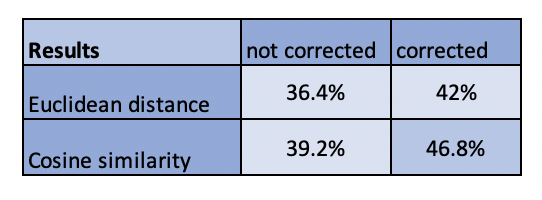

To create the Sorting Hat I tried four different methods: Euclidean Distance and Cosine Similarity, and both once more while correcting the results for User rating behavior.

The method that gives the best results was Cosine Similarity correcting for User rating behavior, with an accuracy of 47%.

Though the method is far from perfect, it is an improvement to the random assigning of houses, which would give an accuracy of 25%.

Euclidean Distance and Cosine Similarity are both used in recommendation alghoritms. In this case the methods are used to find i.e. films and songs that someone would probably like. The recommendation alghorithms look at user similarity, but also to film or song similarity. The output is a recommended song or film, but not a rating. 

Trying to predict a precise rating may be too ambitious with these methods. While calculating the similarity between vectors, the method's are also taking the missing data into account. In the sparse matrix we used 80% of the values are 0's. The 0's in our matrix represent missing data: the rating for a film by user is not existing.
This means that the Cosine Similarity and Eucledian distance give the same importance to missing data as to the film ratings, which can give a bias in the similarity dataframes. Perhaps I could get better results when I include film similarity into the method. 

Or perhaps other methods, for example using machine learning, could give better predictions. Or I could try to improve the way I use user similarity to predict the score. For example by not using a filter on the dataset, so there are more values available. Or to find another method instead of calculating an average out of the 10 ratings given by the most similar users.